In [1]:
import pandas as pd
import statsmodels.api as sm

___
# 1
Загрузите ряд и постройте его график.

In [2]:
milk = pd.read_csv(
    'data/monthly-milk-production.csv',
    sep=';',
    index_col=['month'],
    parse_dates=['month'],
    dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


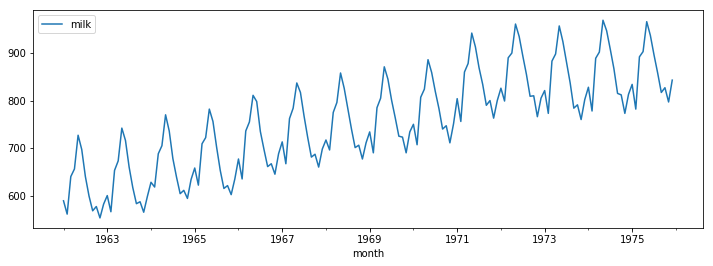

In [4]:
milk.plot(figsize=(12,4));

___
# 2
Примените к ряду из предыдущего вопроса критерий Дики-Фуллера.

In [5]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

___
# 3
Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

In [6]:
milk.index.days_in_month

Int64Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
            ...
            31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
           dtype='int64', name='month', length=168)

In [7]:
milk['per_day'] = milk.milk / milk.index.days_in_month
milk.head()

,milk,per_day
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613


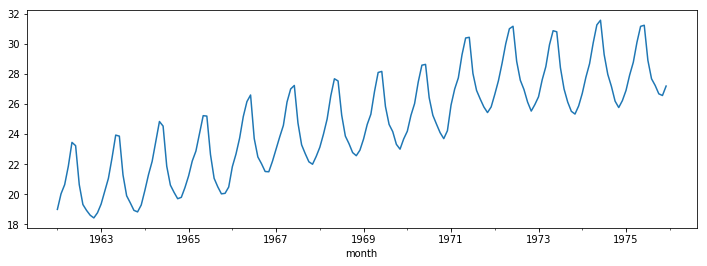

In [18]:
milk.per_day.plot(figsize=(12, 4));

In [9]:
milk.per_day.sum()

4166.326661899466

In [ ]:
pd

___
# Quiz

___
# 6
Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

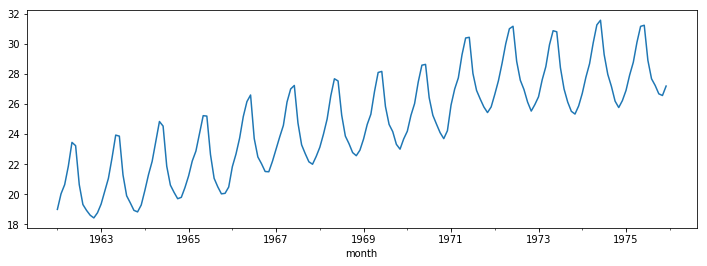

In [20]:
milk.per_day.plot(figsize=(12,4));

___
# 7 
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерий Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

In [21]:
milk['daily_diff1'] = milk.per_day - milk.per_day.shift(1)

In [22]:
milk['daily_diff12'] = milk.per_day - milk.per_day.shift(12)

In [29]:
milk['daily_diff12_1'] = milk.daily_diff12 - milk.daily_diff12.shift(1)

In [33]:
milk.head(15)

,milk,per_day,daily_diff1,daily_diff12,daily_diff12_1
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN
1962-06-01,697,23.233333,-0.218280,NaN,NaN
1962-07-01,640,20.645161,-2.588172,NaN,NaN
1962-08-01,599,19.322581,-1.322581,NaN,NaN
1962-09-01,568,18.933333,-0.389247,NaN,NaN


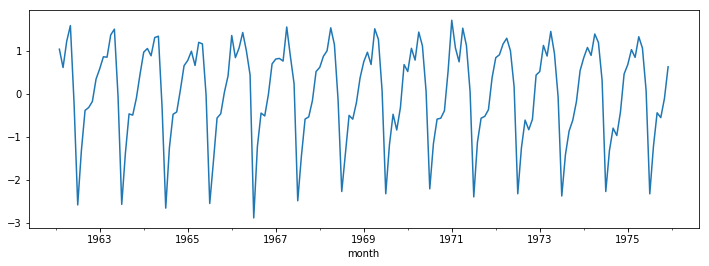

In [37]:
milk.daily_diff1.plot(figsize=(12, 4));

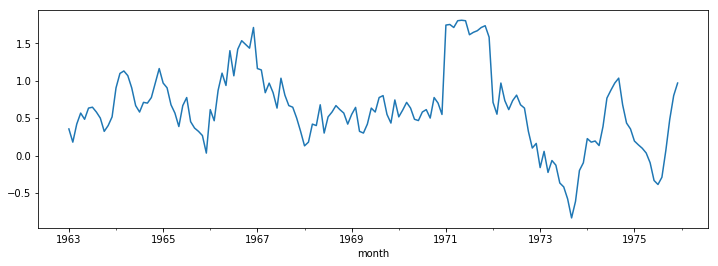

In [38]:
milk.daily_diff12.plot(figsize=(12, 4));

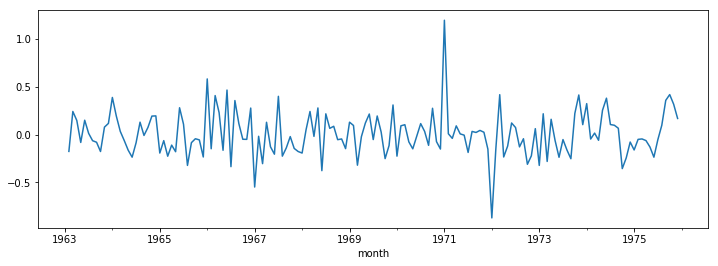

In [35]:
milk.daily_diff12_1.plot(figsize=(12, 4));

#### Проверка стационарности критерием Дики-Фуллера

In [28]:
sm.tsa.stattools.adfuller(milk.per_day.dropna())

(-1.1798216373266037,
 0.682215151308144,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

In [26]:
sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())

(-2.7594694762289365,
 0.06430054654174293,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [27]:
sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [30]:
sm.tsa.stattools.adfuller(milk.daily_diff12_1.dropna())

(-5.481326334796932,
 2.2808455518036712e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

#### Вывод. 
Стационарным становится ряд после последовательного сезонного и обычного дифференцирования.


___
# 8
Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции.

In [72]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib

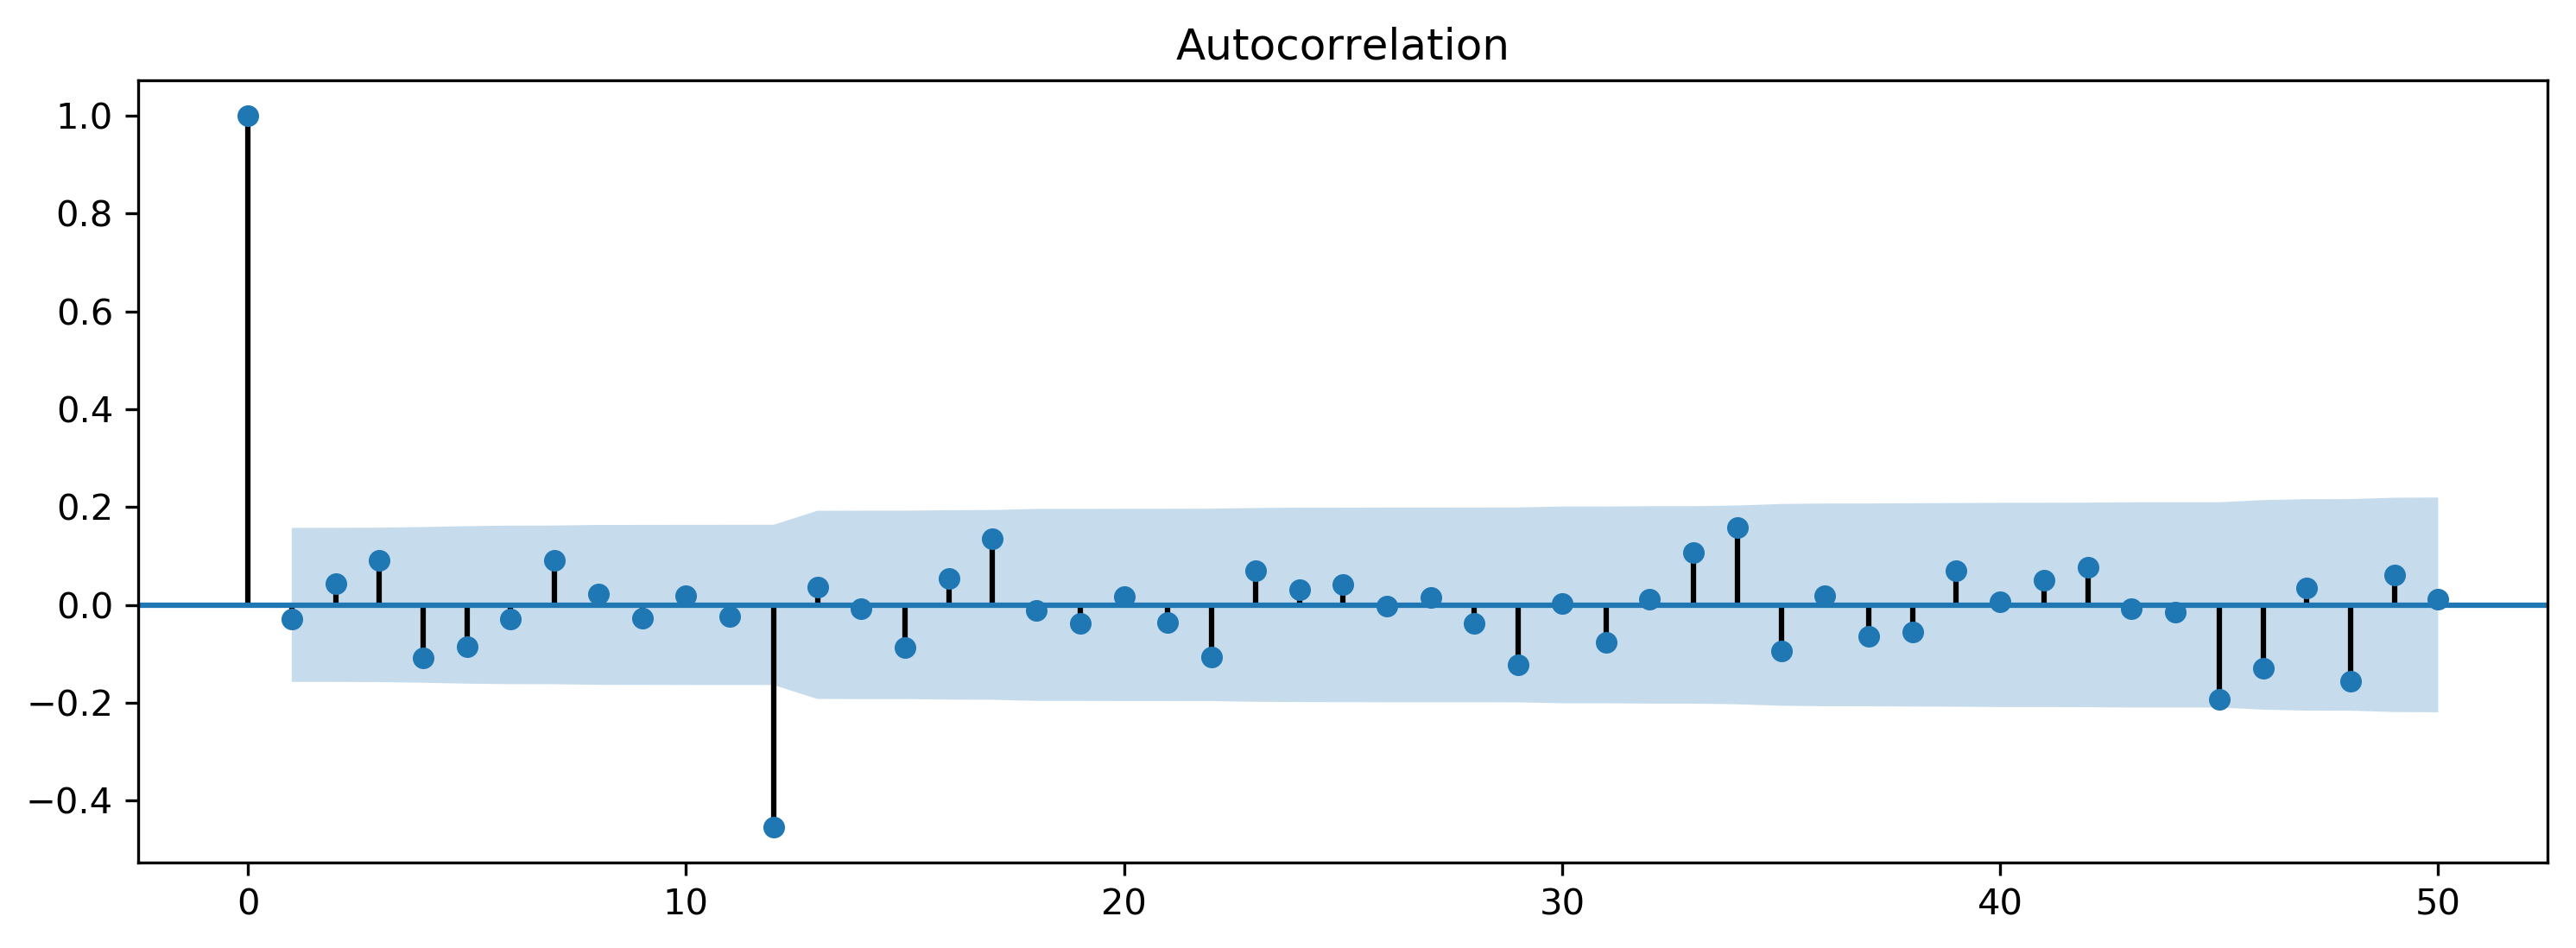

In [106]:
with plt.rc_context(rc={'figure.figsize': (12,4), 'figure.dpi': 300}):
    sm.graphics.tsa.plot_acf(
        milk.daily_diff12_1.dropna().values.squeeze(), lags=50);

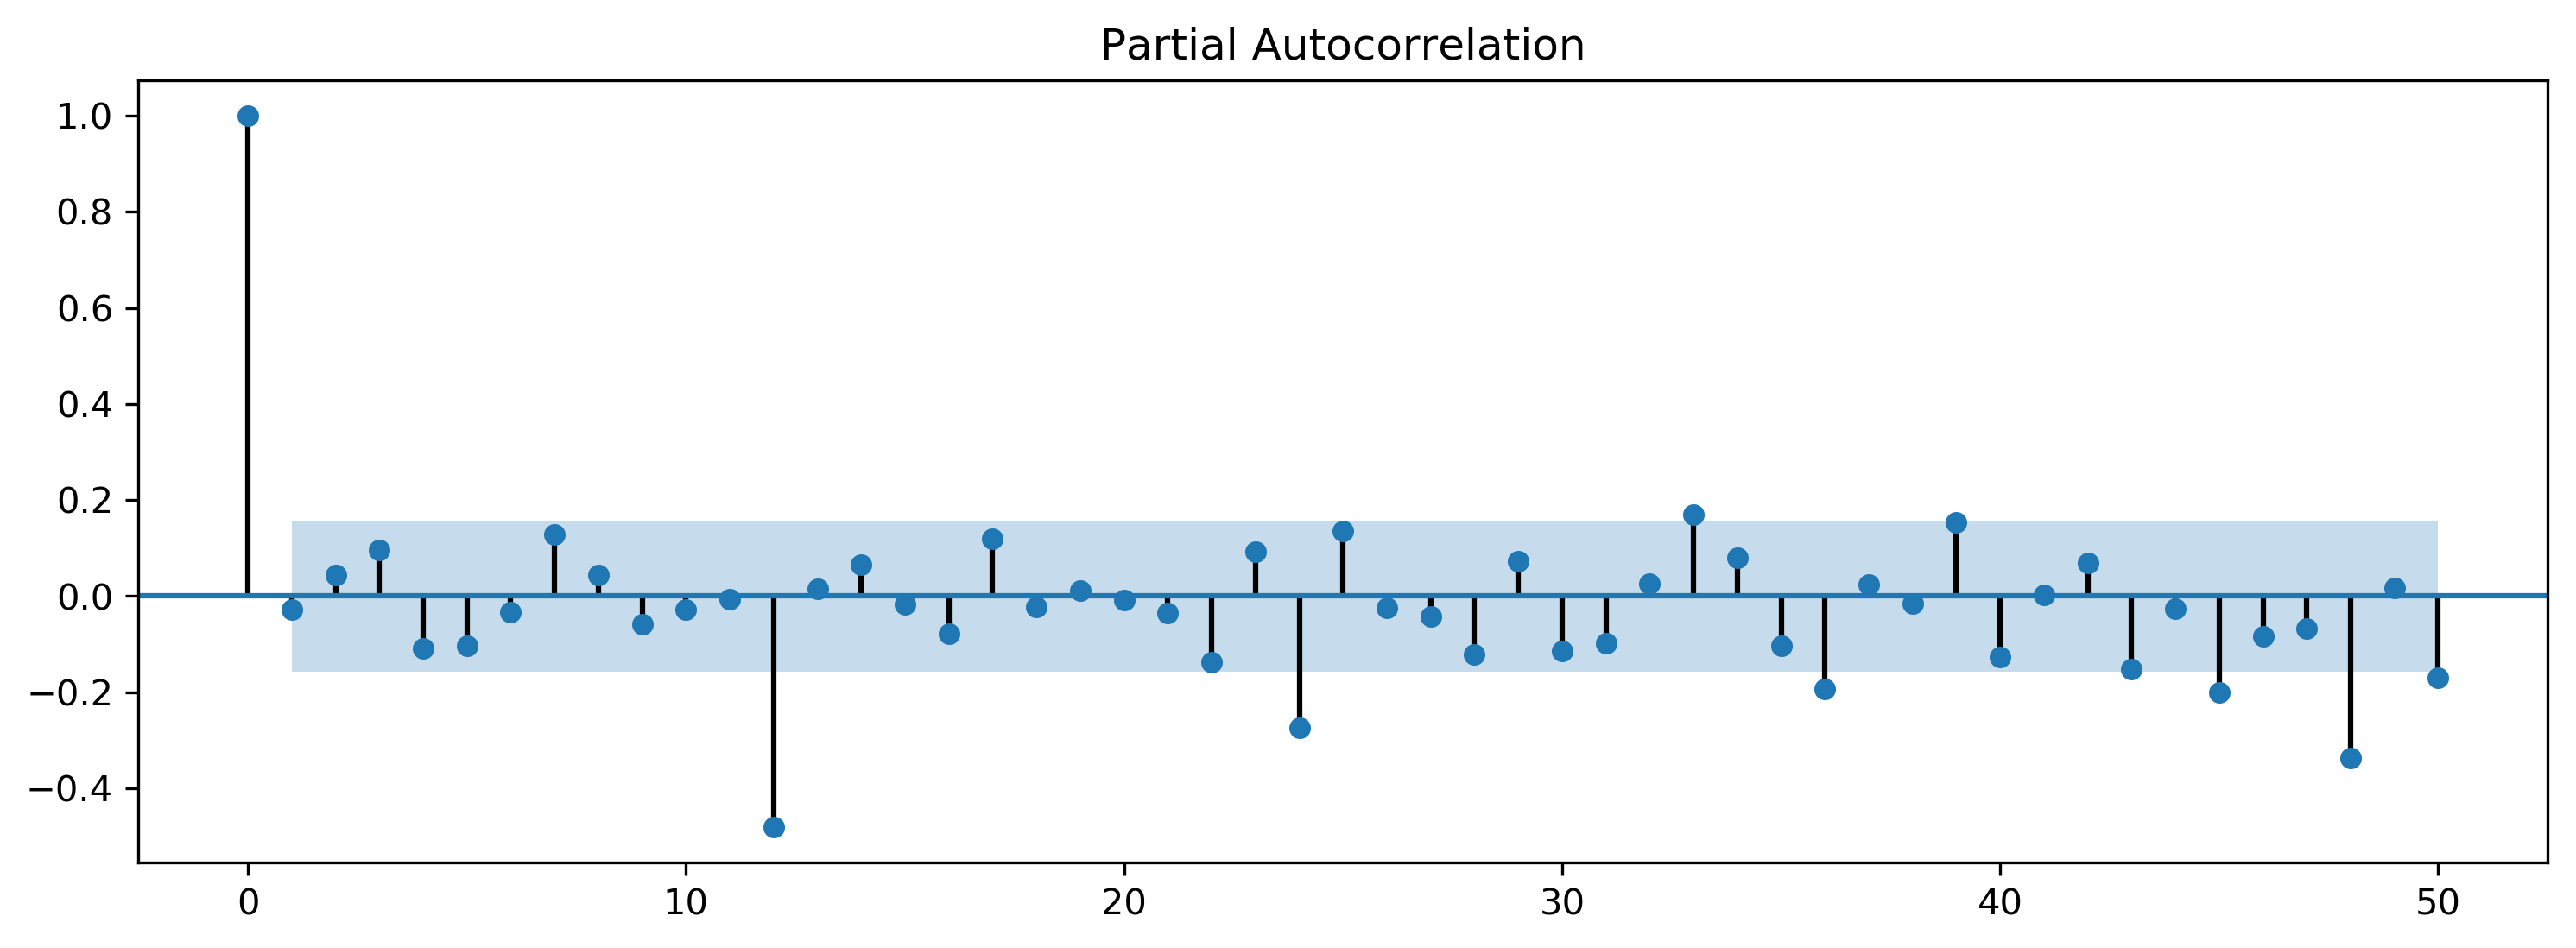

In [104]:
with plt.rc_context(rc={'figure.figsize': (12,4), 'figure.dpi': 300}):
    sm.graphics.tsa.plot_pacf(
        milk.daily_diff12_1.dropna().values.squeeze(), lags=50);

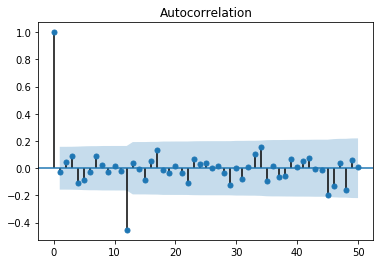

In [115]:
# plt.figure(figsize=(12,4), dpi=300)
# ax = plt.subplot()
sm.graphics.tsa.plot_acf(
        milk.daily_diff12_1.dropna().values.squeeze(), lags=50)
print()